In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adult_train = pd.read_csv('data/adult.data', header=None)
adult_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Đếm theo loại: hiếm, phổ biến
occ = adult_train[14].value_counts()
occ

 <=50K    24720
 >50K      7841
Name: 14, dtype: int64

<BarContainer object of 2 artists>

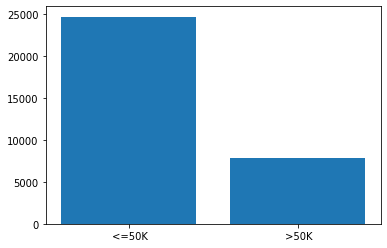

In [5]:
plt.bar(occ.index.values, occ.values)

In [7]:
### Chuyển dữ liệu phân loại thành dạng numeric dùng label encoder và dummy encoder
y_train = adult_train[14]
X_train = adult_train.drop([14], axis=1)

In [8]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [9]:
y_train[:2]

0     <=50K
1     <=50K
Name: 14, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()
y_train_1 = label_encoder.fit_transform(y_train)
y_train_1[:2]

array([0, 0])

In [24]:
# Categorical boolean mask
categorical_feature_mask = X_train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X_train.columns[categorical_feature_mask].tolist()
categorical_cols

[1, 3, 5, 6, 7, 8, 9, 13]

In [13]:
X_train_d = pd.get_dummies(data=X_train, columns=categorical_cols, drop_first=True)
X_train_d.head()

,0,2,4,10,11,12,1_ Federal-gov,1_ Local-gov,1_ Never-worked,1_ Private,...,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from collections import Counter
sorted(Counter(y_train_1).items())

[(0, 24720), (1, 7841)]

### Vì dữ liệu tương đối nhiều => áp dụng undersampling
### giảm số lượng mẫu <=50k bằng với >50k

In [15]:
from sklearn.utils import resample

In [16]:
data_train = X_train_d
data_train[14] = y_train_1

In [17]:
data_0 = data_train[data_train[14]==0]
data_1 = data_train[data_train[14]==1]

In [18]:
display(data_0.shape, data_1.shape)

(24720, 101)

(7841, 101)

In [20]:
data_0_resample = resample(data_0,
                           replace=False, # sample without replacement
                           n_samples=data_1.shape[0], # match minority n
                           random_state=27) # reproducible results 

In [21]:
downsampled = pd.concat([data_0_resample, data_1])
downsampled.head()

,0,2,4,10,11,12,1_ Federal-gov,1_ Local-gov,1_ Never-worked,1_ Private,...,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,14
31749,22,199426,10,0,0,17,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
24093,31,91964,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
21539,37,60313,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
24582,30,85708,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
622,65,109351,5,0,0,24,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [23]:
display(data_0_resample.shape, data_1.shape)

(7841, 101)

(7841, 101)